In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import datetime as date

In [2]:
#criando um dicinário
data = {'year': [
                  2010 , 2011 , 2012 ,
                  2010 , 2011 , 2012 ,
                  2010 , 2011 , 2012
        ],
        'team': [
                  'FCBarcelona', 'FCBarcelona' ,
                  'FCBarcelona', 'RMadrid',
                  'RMadrid', 'RMadrid',
                  'ValenciaCF', 'ValenciaCF',
                  'ValenciaCF' 
        ],
        'wins' : [30 , 28, 32, 29, 32, 26, 21, 17, 19] ,
        'draws' : [6, 7, 4, 5, 4, 7, 8, 10, 8],
        'losses' : [2, 3, 2, 4, 2, 5, 9, 11, 11]
        }

#criando um dataframe Pandas com um dicionário
football = pd. DataFrame (data , columns = [
                  'year', 'team', 'wins', 'draws', 'losses'
                  ])

In [3]:
football

,year,team,wins,draws,losses
0,2010,FCBarcelona,30,6,2
1,2011,FCBarcelona,28,7,3
2,2012,FCBarcelona,32,4,2
3,2010,RMadrid,29,5,4
4,2011,RMadrid,32,4,2
5,2012,RMadrid,26,7,5
6,2010,ValenciaCF,21,8,9
7,2011,ValenciaCF,17,10,11
8,2012,ValenciaCF,19,8,11


In [4]:
#lendo um arquivo csv e convertendo num DataFrame
edu = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/educ_figdp_1_Data.csv",
                  na_values = ':',
                  usecols = ["TIME","GEO","Value"])


edu.describe() # resumo estatistico
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [5]:
#slicing
edu['Value']
edu[10:14]

#The loc and iloc methods are used to select rows or columns based on index or label.
#loc: select rows or columns using labels
#iloc: select rows or columns using indices


edu.iloc[3:5, :] #rows 3 and 4, all columns
edu.loc[3:5, :] #index 3, 4, 5 all columns

edu.loc[90:94, ['TIME', 'GEO']] # index 90 ao 94 seleciona colunas especificas

,TIME,GEO
90,2006,Belgium
91,2007,Belgium
92,2008,Belgium
93,2009,Belgium
94,2010,Belgium


In [6]:
#filtering
edu[edu.Value > 6.5]
edu[edu.GEO > "Belgium"] # Only the names that come after "Belgium" in alphabetical order are selected.
edu[(edu.GEO == "Finland") & (edu.Value > 6)] 
edu[(edu.GEO == "Finland") | (edu.GEO == "France")] 

cities = ["France", "Finland", "Germany", "Greece"]
edu[edu.GEO.isin(cities)]
edu[edu.GEO.str.startswith("G")]
edu[edu.GEO.str.contains("st")]

# Tilde (~): The tilde operator is used for “not” logic in filtering
edu[~edu.GEO.isin(cities)]

edu.query('GEO == "Slovakia" and Value > 4')
edu.nlargest(3,"Value") # n maiores valores na coluna "Value"
edu.nsmallest(3,"Value")  # n menores valores na coluna "Value"

edu[edu.Value.isnull()].head() #filter rows with missing values




,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
36,2000,Euro area (18 countries),NaN
37,2001,Euro area (18 countries),NaN
48,2000,Euro area (17 countries),NaN


In [7]:
# Manipulating data

edu.Value.max()

s = edu["Value"]/100
s. head ()
s = edu.Value.apply(np.sqrt)
s.head()
s = edu.Value.apply(lambda d: d**2)
s.head()

edu["newColumn"] = edu.Value / edu.Value.max()
edu

#drop function removes the indicated rows if axis=0, or the indicated columns if axis=1
edu.drop("newColumn", axis = 1, inplace = True ) #inplace True apaga os dados de  verdade ao contrario de False que apaga uma cópia
edu

edu = edu.append ({"TIME": 2000 ,"Value": 5.00 ,"GEO": "Brazil"}, ignore_index = True ) #add linha com valores
edu. tail ()

edu.drop(max(edu.index), axis = 0, inplace = True) #remove
edu.tail()

eduDrop = edu[~edu.Value.isnull()] #remove valor nulos (~) inverte ordem

edudrop = edu.dropna(subset=['Value'], inplace=False) # removendo usando função dropna

edudrop = edu.dropna(how='any', inplace=False) # set the how keyword to any to drop all values na

edufill = edu.fillna(value={"Value": 0}) # preenche com zero todos os valores NA na coluna Value

edufill

,TIME,GEO,Value
0,2000,European Union (28 countries),0.00
1,2001,European Union (28 countries),0.00
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
...,...,...,...
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85


In [9]:
#sorting
edudrop.sort_values(by='Value', ascending= False) # Ordenação Ascending True inverte ordem

#grouping data
group = edu[["GEO", "Value"]].groupby("GEO").mean() # agrupa as coluna com a media
group = group.sort_values(by='Value', ascending= False)
group.head()

edu.sort_values(by='Value', ascending= False).groupby("GEO").first() # agrupado os paises e obtido maior value
edu.groupby('GEO').size()
#edu.groupby('GEO')[['Value']].sum() # agrupa pela soma 
#edu.groupby('GEO').get_group('Bulgaria')

edu.groupby("GEO").agg(["max","mean"])
edu.groupby("GEO").agg({"TIME":"max","Value": "mean"}).head()


,TIME,Value
GEO,,
Austria,2011,5.618333
Belgium,2011,6.189091
Bulgaria,2011,4.093333
Cyprus,2011,7.023333
Czech Republic,2011,4.168333


In [60]:
# Rearranging data

# We can transform the arrangement of our data, redistributing the indexes and columns
# for better manipulation of our data. Here, we can specify which columns will be the new indexes,
# the new values, and the new columns

filtered_data = edu[edu.TIME > 2005]
pivedu = pd.pivot_table(filtered_data, values = 'Value',
                        index = ['GEO'],
                        columns = ['TIME'])
pivedu.head()

pivedu.loc[['Spain','Portugal'], [2006,2011]] # use the new index to select specific rows by label

edu['GEO'][edu.GEO.str.startswith("Euro")]
pivedu2 = pivedu.drop(edu['GEO'][edu.GEO.str.startswith("Euro")], axis=0).dropna() # Removendo European union e valores NA 
pivedu2 = pivedu2.rename(index ={'Germany (until 1990 former territory of the FRG)': 'Germany'}) #Renomeando Alemanha
pivedu2
pivedu2.rank(ascending ='True', method='first')

totalsum = pivedu2.sum(axis = 1)
totalsum.rank(ascending ='True', method='dense').sort_values().head()


GEO
Slovakia          1.0
Bulgaria          2.0
Czech Republic    3.0
Italy             4.0
Spain             5.0
dtype: float64

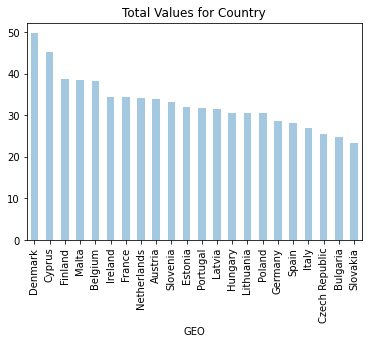

In [63]:
# Plotting

totalsum = pivedu2.sum(axis = 1).sort_values(ascending=False)
totalsum.plot(kind='bar', style = 'b', alpha= 0.4,
              title = "Total Values for Country") 

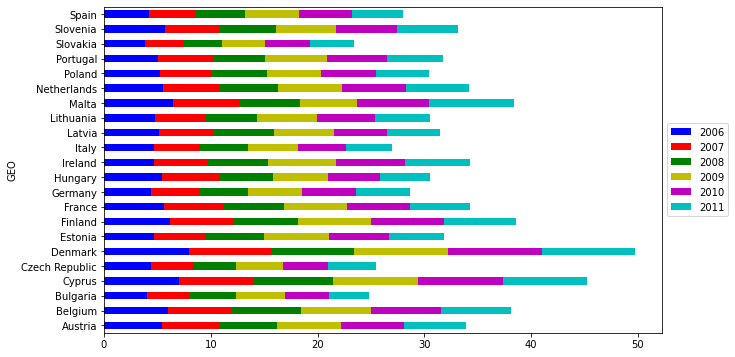

In [68]:
my_colors = ['b', 'r', 'g', 'y', 'm', 'c']
ax = pivedu2.plot (kind = 'barh',
                  stacked = True,
                  color = my_colors, figsize=(10, 6))
ax.legend (loc = 'center left', bbox_to_anchor = (1, .5))

